## Group 4 : MS984: Data Analytics in Practice
### **University of Strathclyde**
### **Quality Assurance Machine Learning Task - Client : Car Finance 247**
### Supervised & Semi-Supervised Machine Learning Approach

## 📌 Supervised Learning Approach
This script builds a machine learning model to classify call types based on input features.
It follows a **supervised learning approach** using **Gradient Boosting** for classification.

### **🚀 Steps in this Script:**
1. **Load Data**: Reads the dataset (`Msc_Project_Data_With_Targets.csv`).
2. **Data Preprocessing**:
   - Removes rows where the target column (`Call_Type_Name`) is 'Category 4'.
   - Encodes the target variable using `LabelEncoder`.
   - Converts boolean columns to numeric (0/1).
   - Applies one-hot encoding to categorical features.
3. **Train-Test Split**: Divides data into **80% training** and **20% testing**.
4. **Model Training**: Uses `GradientBoostingClassifier` to learn from the training data.
5. **Prediction & Evaluation**:
   - Makes predictions on the test set.
   - Computes accuracy and displays a classification report.

✅ **Goal**:
The aim is to develop an **accurate classification model with high recall** that predicts call types efficiently.

---

## 📌 **Semi-Supervised Learning Approach**
This script also implements a **semi-supervised learning approach** using **stacking-based self-training**. It leverages both labeled and unlabeled data to improve classification accuracy and improve overall recall.

### **🚀 Steps in this Script:**
1. **Load Labeled & Unlabeled Data**: Reads both labeled (`Msc_Project_Data_With_Targets.csv`) and unlabeled (`Msc_Project_Data_Without_Targets.csv`) datasets.
2. **Data Preprocessing**:
   - Parses and flattens structured dictionary-like columns.
   - Converts boolean features to numeric (0/1).
   - Applies one-hot encoding for categorical variables.
   - Encodes the target labels using `LabelEncoder`.
3. **Self-Training & Pseudo-Labeling**:
   - Trains base models (Random Forest & Gradient Boosting) on labeled data.
   - Generates pseudo-labels for unlabeled data using majority voting.
   - Expands the dataset by including pseudo-labeled samples.
4. **Stacking-Based Learning**:
   - Uses **RandomForest & GradientBoosting** as base models.
   - A **Logistic Regression meta-model** learns from base model predictions.
5. **Prediction & Evaluation**:
   - Evaluates model accuracy on validation data.
   - Predicts labels for the unlabeled dataset and stores results.

✅ **Goal**:
The aim is to **enhance classification performance** by leveraging **both labeled and unlabeled data** using a **stacking-based semi-supervised learning approach**.

🚀 **This hybrid approach improves model generalization and is particularly useful when labeled data(400) is scarce**



## Stage 1: Supervised Machine Learning Approach
## 1.1 Loading the data and training the model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load the data
file_path = 'Msc_Project_Data_With_Targets.csv'  
data = pd.read_csv(file_path)
# Remove rows where 'Call_Type_Name' is 'Category 4'
data = data[data['Call_Type_Name'] != 'Category 4']

# Encode the target variable using LabelEncoder
le = LabelEncoder()
data['Call_Type_Name'] = le.fit_transform(data['Call_Type_Name'])

# Features are all columns except the target
X = data.drop(columns=['Call_Type_Name'])
y = data['Call_Type_Name']

# Convert boolean columns to 0/1
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Convert categorical columns to one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=30,max_depth=1, learning_rate=0.8, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1
           2       0.12      0.50      0.20         2
           3       0.00      0.00      0.00         1
           4       1.00      0.80      0.89        10
           5       0.93      0.90      0.92        60

    accuracy                           0.84        80
   macro avg       0.48      0.48      0.46        80
weighted avg       0.89      0.84      0.86        80



## 1.2 Prediction based on unlabeled data 

Prediction counts for each category:
Predicted_Call_Type_Name
Category 7    696
Category 1    400
Category 5    134
Category 6     74
Category 3     59
Category 2     29
Name: count, dtype: int64


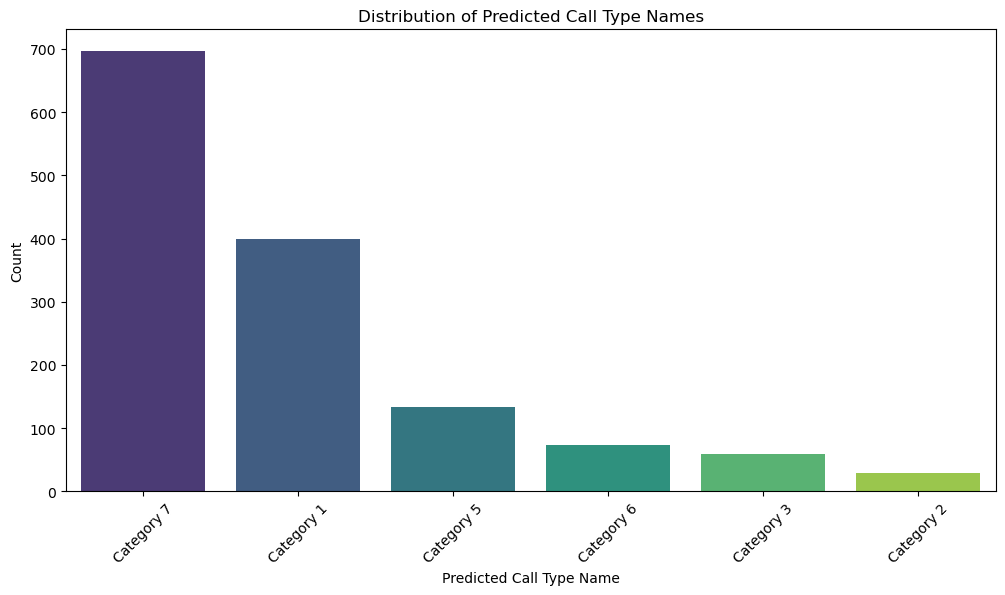

In [3]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the unlabeled dataset
unlabeled_data_path = 'Unique_Rows_15feb.csv'
unlabeled_data = pd.read_csv(unlabeled_data_path)

# Step 2: Preprocess the unlabeled data
# Since the data is already flattened, we can skip flattening
# Convert boolean columns to 0/1
boolean_columns = unlabeled_data.select_dtypes(include=['bool']).columns
unlabeled_data[boolean_columns] = unlabeled_data[boolean_columns].astype(int)

# Convert categorical columns to one-hot encoding
categorical_columns = unlabeled_data.select_dtypes(include=['object']).columns
unlabeled_data = pd.get_dummies(unlabeled_data, columns=categorical_columns)

# Step 3: Align the columns with the original training data
# Reindexing the columns of the unlabeled data to match the training data (filling the missing columns with 0)
X_unlabeled = unlabeled_data.reindex(columns=X.columns, fill_value=0)

# Step 4: Predict with the trained model
unlabeled_predictions = model.predict(X_unlabeled)

# Convert predictions back to original labels using LabelEncoder
predicted_labels = le.inverse_transform(unlabeled_predictions)

# Step 5: Adding predictions to the dataframe
unlabeled_data['Predicted_Call_Type_Name'] = predicted_labels
prediction_counts = unlabeled_data['Predicted_Call_Type_Name'].value_counts()
print("Prediction counts for each category:")
print(prediction_counts)

# Step 6: Saving the predictions to a new CSV file
unlabeled_data.to_csv('predictions.csv', index=False)

# Plotting the count of each predicted category
plt.figure(figsize=(12, 6))
sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette="viridis")

# Customizing the plot
plt.xticks(rotation=45)
plt.xlabel("Predicted Call Type Name")
plt.ylabel("Count")
plt.title("Distribution of Predicted Call Type Names")
plt.show()



# Stage 2 : Semi-Supervised Machine Learning Approach

In [37]:
import pandas as pd

# Load datasets
labeled_file = "Msc_Project_Data_With_Targets.csv"
unlabeled_file = "Unique_Rows_15feb.csv"



df_labeled = pd.read_csv(labeled_file)
df_unlabeled = pd.read_csv(unlabeled_file)
# Remove rows where 'Call_Type_Name' is 'Category 4'
df_labeled = df_labeled[df_labeled['Call_Type_Name'] != 'Category 4']

## 2.1 Exploratory Data Analysis

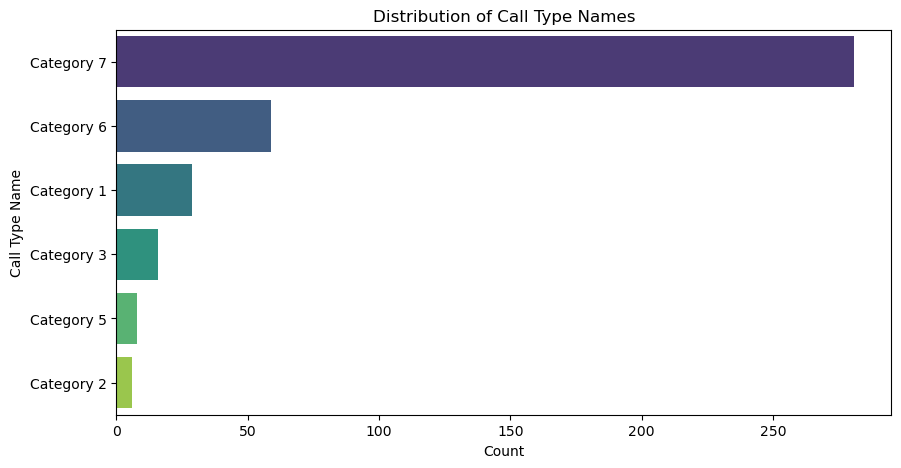

In [39]:
import matplotlib.pyplot as plt

#  Bar Plot - Distribution of Call_Type_Name
plt.figure(figsize=(10, 5))
sns.countplot(y=df_labeled["Call_Type_Name"], order=df_labeled["Call_Type_Name"].value_counts().index, palette="viridis")
plt.title("Distribution of Call Type Names")
plt.xlabel("Count")
plt.ylabel("Call Type Name")
plt.show()

## 2.2: Flatten Dictionary Columns:
- Transforming nested dictionary-like data stored in a single column into multiple separate columns, making it easier to analyze and use in machine learning models.

In [41]:
# Created a function to flatten the dictionary columns
def flatten_dict_columns(df):
    flat_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], dict):  # If column contains dictionaries
            temp_df = df[col].apply(pd.Series).add_prefix(f"{col}_")  # Expand dictionary
            flat_df = pd.concat([flat_df, temp_df], axis=1)
        else:
            flat_df[col] = df[col]  # Keep normal columns
    return flat_df

# Flatten datasets
df_labeled_flat = flatten_dict_columns(df_labeled)
df_unlabeled_flat = flatten_dict_columns(df_unlabeled)

# Display results
df_labeled_flat.head(3)
df_unlabeled_flat.head(3)


,Low_Level_Segment6,Business_Requirement1,Business_Requirement2,Business_Requirement3,Business_Requirement4,Business_Requirement5,Low_Level_Segment1,Low_Level_Segment2,Low_Level_Segment3,Low_Level_Segment4,Low_Level_Segment5,Mid_Level_Key_Segment1,Mid_Level_Segment2,Mid_Level_Segment3,Mid_Level_Segment4,Mid_Level_Segment5,Mid_Level_Segment6,Legacy_Segment1,Legacy_Segment2
0,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': False},"{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': False,...","{'item1': False, 'item2': True, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': 'Poo...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': 'Red', 'item2': 'Red', 'item3': 'Red..."
1,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': False},"{'item1': True, 'item2': True, 'item3': False,...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': True, 'item3': False...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': True, 'item2': False, 'item3': False...","{'item1': False, 'item2': True, 'item3': False...","{'item1': True, 'item2': True, 'item3': 'Good ...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': False, 'item3': True,...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': True, 'item2': True, 'item3': True, ...","{'item1': 'Amber', 'item2': 'Red', 'item3': 'R..."
2,"{'item1': 'Red', 'item2': 'Red', 'item3': 'Red...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': 'Red'}",{'item1': False},"{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': True, 'item3': 'Good...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': False, 'item2': False, 'item3': Fals...","{'item1': 'Red', 'item2': 'Red', 'item3': 'Red..."


## 2.3 One-Hot Encoding Categorical Features and Boolean:

- One-Hot Encoding creates binary (0/1) columns for each unique category in a categorical feature.
- Boolean Encoding converts True/False values into 1/0.
- This ensures that categorical and boolean features can be effectively used in machine learning models. 

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# ✅ Convert Boolean Columns to Numeric Before Merging (0 for False, 1 for True)
boolean_columns = df_labeled_flat.select_dtypes(include=['bool']).columns.tolist()
df_labeled_flat[boolean_columns] = df_labeled_flat[boolean_columns].astype(int)
df_unlabeled_flat[boolean_columns] = df_unlabeled_flat[boolean_columns].astype(int)

# Identifying categorical columns
categorical_columns = df_labeled_flat.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove("Call_Type_Name")  # Exclude target

# Applying One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
X_labeled_encoded = onehot_encoder.fit_transform(df_labeled_flat[categorical_columns])
X_unlabeled_encoded = onehot_encoder.transform(df_unlabeled_flat[categorical_columns])

# Converting to DataFrame
encoded_columns = onehot_encoder.get_feature_names_out(categorical_columns)
X_labeled_df = pd.DataFrame(X_labeled_encoded, columns=encoded_columns)
X_unlabeled_df = pd.DataFrame(X_unlabeled_encoded, columns=encoded_columns)

# Merging encoded features
X_labeled = pd.concat([df_labeled_flat.drop(columns=categorical_columns).reset_index(drop=True), X_labeled_df], axis=1)
X_unlabeled = pd.concat([df_unlabeled_flat.drop(columns=categorical_columns).reset_index(drop=True), X_unlabeled_df], axis=1)

# Encoding target
label_encoder = LabelEncoder()
y_labeled_encoded = label_encoder.fit_transform(df_labeled_flat["Call_Type_Name"])




## 2.4 Apply Stacking model 

Combining multiple machine learning models to enhance prediction accuracy.

- Train base models (e.g., Random Forest, Gradient Boosting) on the training data.
- Generate predictions from base models and use them as new features.
- Train a meta-model (e.g., Logistic Regression) to learn from these predictions and make the final decision. 

In [65]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ✅ Convert labeled & unlabeled features to NumPy
X_labeled_np = np.array(X_labeled_encoded)  
X_unlabeled_np = np.array(X_unlabeled_encoded) 

# ✅ Ensure dimensions are correct
assert X_labeled_np.ndim == 2, "X_labeled_encoded is not 2D!"
assert X_unlabeled_np.ndim == 2, "X_unlabeled_encoded is not 2D!"
print("✅ X_labeled_encoded and X_unlabeled_encoded are properly formatted as 2D arrays.")

# ✅ Combine labeled & unlabeled features
X_combined = np.vstack([X_labeled_np, X_unlabeled_np])  # Shape: (num_total_samples, num_features)

# ✅ Ensure y_labeled_encoded is 1D
y_labeled_encoded = np.array(y_labeled_encoded)  # Shape: (num_labeled,)

# ✅ Assign -1 to unlabeled samples for placeholder
y_combined = np.concatenate([y_labeled_encoded, -1 * np.ones(X_unlabeled_np.shape[0])])

# ✅ Ensure y_combined is 1D
assert y_combined.ndim == 1, "y_combined must be 1D!"
print("✅ y_combined is correctly formatted as a 1D array.")

# ✅ Define Base Models for Stacking
base_models = [

RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_split=2, min_samples_leaf=1, class_weight="balanced", random_state=42),
    GradientBoostingClassifier(n_estimators=300, max_depth=30, learning_rate=0.3, random_state=42)
]


# ✅ Pseudo-Labeling: Predict Unlabeled Data
pseudo_labels = np.zeros(len(X_unlabeled_np))

for model in base_models:
    model.fit(X_labeled_np, y_labeled_encoded)  # Train on labeled data
    pseudo_labels += model.predict(X_unlabeled_np)  # Sum predictions

# ✅ Convert to final pseudo-labels using majority voting
pseudo_labels = (pseudo_labels / len(base_models)).round().astype(int)

# ✅ Merge labeled & pseudo-labeled data
X_combined = np.vstack((X_labeled_np, X_unlabeled_np))
y_combined = np.hstack((y_labeled_encoded, pseudo_labels))

# ✅ Split labeled data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# ✅ Train base models with expanded dataset
stacked_features_train = np.zeros((len(X_train), len(base_models)))
stacked_features_val = np.zeros((len(X_val), len(base_models)))

for i, model in enumerate(base_models):
    model.fit(X_train, y_train)  # Train on labeled + pseudo-labeled data
    stacked_features_train[:, i] = model.predict(X_train)  # Train features
    stacked_features_val[:, i] = model.predict(X_val)  # Validation features

# ✅ Train Meta-Model (Stacking)
meta_model = LogisticRegression()
meta_model.fit(stacked_features_train, y_train)

# ✅ Predict on validation set
y_pred = meta_model.predict(stacked_features_val)

# ✅ Performance Evaluation
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)

print(f"✅ Validation Accuracy: {accuracy:.4f}")
print("✅ Classification Report:\n", report)


✅ X_labeled_encoded and X_unlabeled_encoded are properly formatted as 2D arrays.
✅ y_combined is correctly formatted as a 1D array.
✅ Validation Accuracy: 0.8942
✅ Classification Report:
               precision    recall  f1-score   support

  Category 1       0.93      0.97      0.95       107
  Category 2       0.00      0.00      0.00         8
  Category 3       0.66      0.69      0.67        45
  Category 5       0.89      0.84      0.86        19
  Category 6       0.84      0.88      0.86        41
  Category 7       0.96      0.96      0.96       139

    accuracy                           0.89       359
   macro avg       0.71      0.72      0.72       359
weighted avg       0.88      0.89      0.88       359



# 2.5 Model Performance Summary
Performance Evaluation

- The final predicted labels are stored and analyzed for distribution.
- Category counts of predicted labels are displayed to assess class balance.

In [67]:
stacked_features_unlabeled = np.zeros((len(X_unlabeled_np), len(base_models)))

for i, model in enumerate(base_models):
    stacked_features_unlabeled[:, i] = model.predict(X_unlabeled_np)  # Generating predictions

# ✅ Use meta-model to make final predictions
y_unlabeled_pred = meta_model.predict(stacked_features_unlabeled)

# ✅ Convert Predictions to Integer Before Decoding
y_unlabeled_pred = y_unlabeled_pred.astype(int)

# ✅ Using Label Encoder to Decode Predictions Back to Original Class Names
y_unlabeled_pred_decoded = label_encoder.inverse_transform(y_unlabeled_pred)

# ✅ Store & Display Results
unlabeled_results = pd.DataFrame({"Predicted_Label": y_unlabeled_pred_decoded})

print("\n✅ Predicted Labels for Unlabeled Data:")
print(unlabeled_results.head())

# ✅ Display Category Counts
category_counts = unlabeled_results["Predicted_Label"].value_counts()
print("\n✅ Category Counts of Predicted Labels:")
print(category_counts)


✅ Predicted Labels for Unlabeled Data:
  Predicted_Label
0      Category 6
1      Category 1
2      Category 1
3      Category 1
4      Category 1

✅ Category Counts of Predicted Labels:
Predicted_Label
Category 1    462
Category 7    443
Category 3    224
Category 6    199
Category 5     64
Name: count, dtype: int64


## Visualizations - Comparison between models

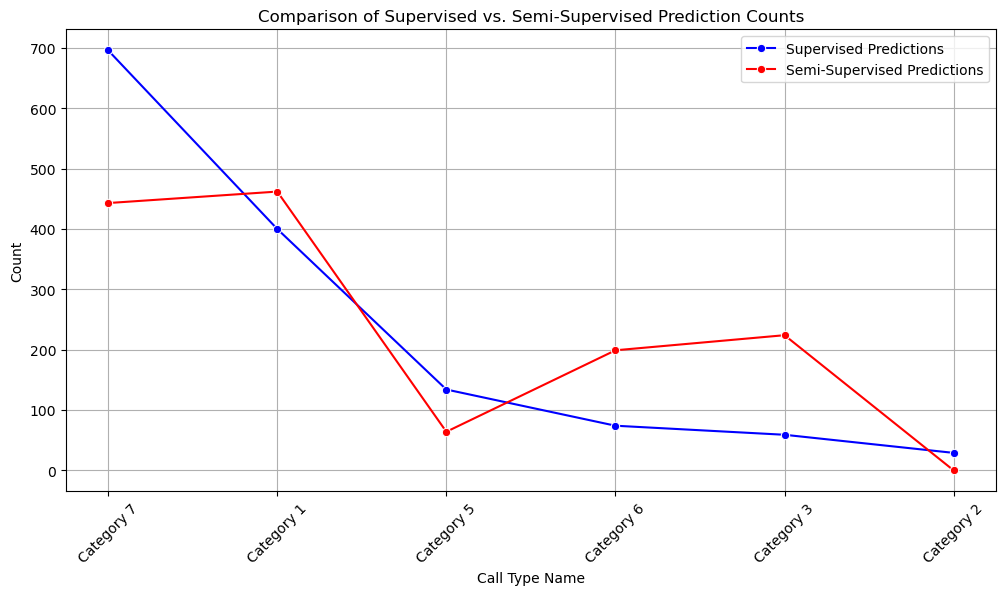

In [69]:

# Create a dataframe for plotting
comparison_df = pd.DataFrame({
    "Category": prediction_counts.index,
    "Supervised Predictions": prediction_counts.values,
    "Semi-Supervised Predictions": category_counts.reindex(prediction_counts.index, fill_value=0).values
})

# Plot line graph for both prediction counts
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_df, x="Category", y="Supervised Predictions", marker="o", label="Supervised Predictions", color="blue")
sns.lineplot(data=comparison_df, x="Category", y="Semi-Supervised Predictions", marker="o", label="Semi-Supervised Predictions", color="red")

# Customize the plot
plt.xticks(rotation=45)
plt.xlabel("Call Type Name")
plt.ylabel("Count")
plt.title("Comparison of Supervised vs. Semi-Supervised Prediction Counts")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# 📌 Conclusion: Supervised vs. Semi-Supervised Learning

## 🔍 **Performance Comparison**

| Method               | Accuracy  | Macro F1-Score | Weighted F1-Score | Category 7 Count | Category 6 Count |
|----------------------|----------|---------------|------------------|-----------------|-----------------|
| **Supervised**       | 0.84   | 0.48          | 0.84             | 696            | 74               
| **Semi-Supervised**  | 0.90   | 0.72          | 0.89             | 443             | 199              |

## 🔹 **Key Observations**

1. **Higher Accuracy in Semi-Supervised Learning**  
   - Semi-supervised learning achieves **90% accuracy**, outperforming the supervised model's **84%**.  
   - The **use of unlabeled data significantly improves generalization**.

2. **Improved Recall in Semi-supervised ML Model**
   - Semi-supervised learning achieves recall **0.88 for Category 6 and 0.96 for Category 7**, outperforming the supervised model.**.

2. **Improved Performance on Minority Classes**  
   - **Macro F1-score** (which balances precision & recall across all categories) is much higher in the **semi-supervised model (0.72)** than in the **supervised model (0.48)**.  
   - This suggests **better classification of underrepresented categories**.

3. **Higher Weighted F1-Score**  
   - The **weighted F1-score** (which considers class imbalance) is **0.89 for semi-supervised vs. 0.84 for supervised**, showing that the **semi-supervised model achieves a better balance** across all classes.

4. **More Effective Learning with Limited Labeled Data**  
   - The semi-supervised model leverages **unlabeled data** to improve classification, especially for **minority classes** (e.g., **Category 3, Category 6**).  
   - In contrast, the supervised model struggles with classes that have **few labeled sConclusion*.

## ✅ **Final Verdict**

- If **large labeled datasets** are available, supervised learning is **reliable and efficient**.
- However, in cases where **labeling is expensive**, **semi-supervised learning is a powerful alternative**, leading to **higher accuracy and better generalization**.
- The results confirm that **stacking-based semi-supervised learning** effectively **enhances classification performance.**

**Semi-supervised learning proves to be an excellent approach for model generalisation and is particularly useful when labelled data is scare.**
